In [1]:
#import scipy as sio

In [2]:
#import sys
#!{sys.executable} -m pip install scipy

# question 1

In [10]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import numpy as np
import pylab as pl
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib
import pandas as pd
import scipy.io as sio
import sklearn
import sklearn.neighbors
import sklearn.datasets
from sklearn import decomposition, manifold


# Q1.1-Swiss Role Dataset
### section1

In [4]:


u = np.random.uniform(0, 20, 3000)
v = np.random.uniform(0, 1, 3000)
x = u * np.cos(u)
y = u * np.sin(u)
z = v

color = u / u.max()



# section2

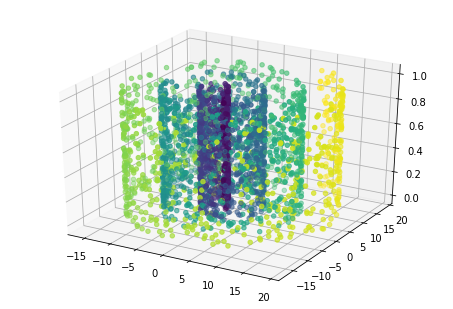

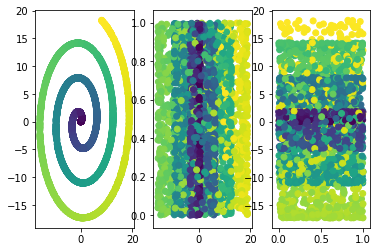

In [5]:

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=color)
fig, ax = plt.subplots(1, 3)
ax[0].scatter(x, y, c=color)
ax[1].scatter(x, z, c=color)
ax[2].scatter(z, y, c=color)
plt.show()

In [6]:
"""tmp=[1 ,2 ,3,4, 5, 6,7, 8, 9]
tmp=pd.DataFrame(tmp)
tmp.shape

print(tmp.iloc[:,0].values)"""

'tmp=[1 ,2 ,3,4, 5, 6,7, 8, 9]\ntmp=pd.DataFrame(tmp)\ntmp.shape\n\nprint(tmp.iloc[:,0].values)'

# Q1.2-Face Dataset
### section1+2

(4096, 698)


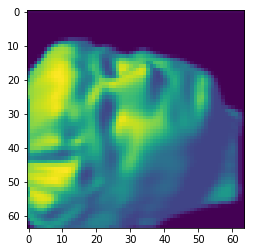

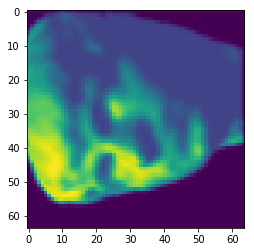

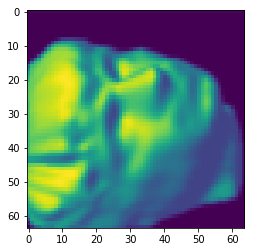

In [7]:

data = sio.loadmat('./face_data.mat')
images = data['images']
print(np.shape(images))
facesData =pd.DataFrame(images.T)
faces_labels = pd.DataFrame(data['poses'].T,columns=['poseX', 'poseY'])
faces_labels['lights']=data['lights'].T
faces_labels_scale =pd.DataFrame(sklearn.preprocessing.MinMaxScaler(feature_range=(0.2,0.95)).fit_transform(faces_labels),columns=[faces_labels.columns])
# faces_labels_scale['lights']=faces_labels_scale['lights']
faces_rgb_color = matplotlib.colors.hsv_to_rgb(faces_labels_scale)

# section2
def plot3images(pd_data,size): 
    plt.imshow(pd_data.iloc[0,:].values.reshape((size,size)))
    plt.show()
    plt.imshow(pd_data.iloc[1,:].values.reshape((size,size)))
    plt.show()
    plt.imshow(pd_data.iloc[2,:].values.reshape((size,size)))
    plt.show()

plot3images(facesData,64)

### section4-
### Each point is an image such that it has dimension of D=4096 and the whole (filtered)dataset contains N=698 images.


# Q1.3-MNIST Dataset
### section1

In [8]:

import pickle , gzip
import numpy as np
f = gzip.open( './mnist.pkl.gz' , 'rb' )
train_set , valid_set , test_set =pickle . load(f,encoding='latin1')
f.close
train_set_images =train_set[0]
train_set_images=train_set_images.T
train_set_digit_number =train_set[1]
np.shape(train_set_images)
data =pd.DataFrame(train_set_images.T)
label = pd.Series(train_set_digit_number.T)

In [9]:
filtered_data=data[label>6]
filtered_data.shape

(15005, 784)

# section2

In [10]:

filtered_data.iloc[5,:].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 29, dtype: float32

# section3

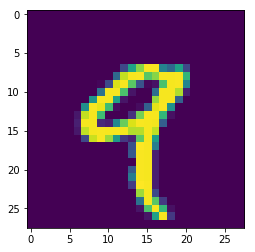

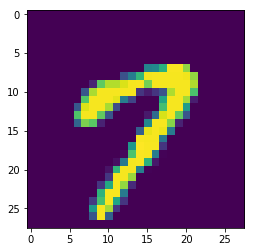

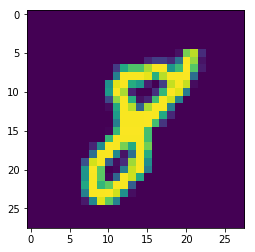

In [11]:

plot3images(filtered_data,28)

# section4
## Each point is an image such that it has dimension of D=783 and the whole (filtered)dataset contains N=15005 images.

# question 2

In [12]:
data, label = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)

In [13]:
data = pd.DataFrame(data)

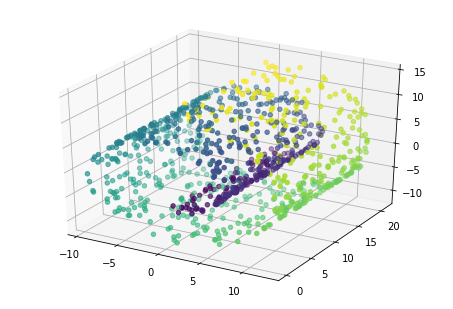

In [14]:
ax = Axes3D(plt.figure())
ax.scatter(data[0],data[1],data[2],c=label)
plt.show()

In [15]:
#question 2.1.1 pca to the data set to 2 parameters
pr_dict ={}
pr_dict['extension']= data
pr_dict['pca'] = pd.DataFrame(decomposition.PCA(n_components=2 ).fit_transform(data))
pr_dict['kpca'] = pd.DataFrame(decomposition.KernelPCA(n_components=2, kernel='rbf',gamma=0.03 ).fit_transform(data))


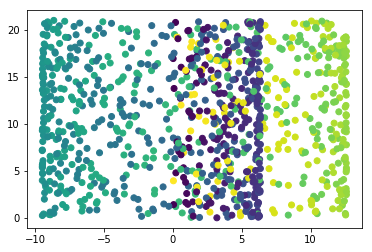

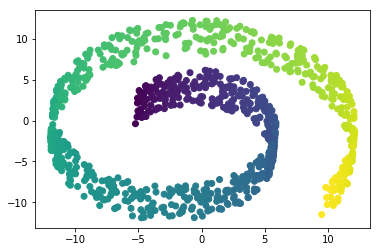

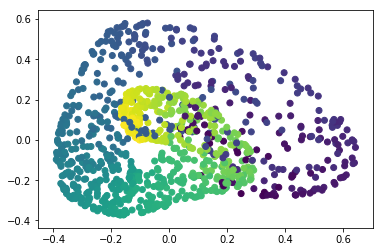

In [16]:
for key in pr_dict.keys():
    plt.scatter(pr_dict[key][0],pr_dict[key][1],c=label)
    plt.show()

we after iterating diferent gamma values $\gamma = \frac{1}{2*\sigma^2}$ we find that $\gamma = 0.03$ represents the data the best

## question 2.1.1
- 3

In [17]:
# The idea is to unfold the data knowing how the data is build 
# 
data2= data.copy()
data2['arctan']= np.arctan(data[0]/data[2])*100
data2['big_zed']= data[1]*100

c:\users\alejandro\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))


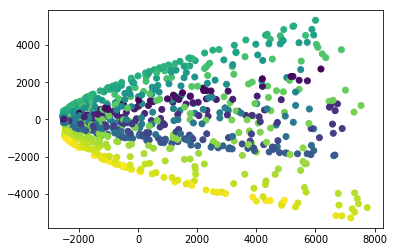

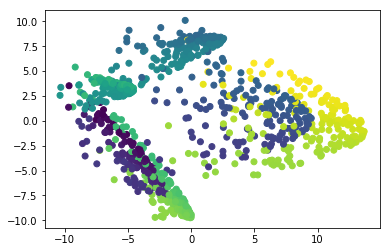

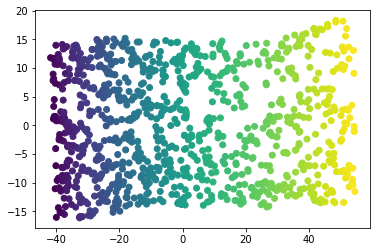

In [18]:
#since we have told we can use any sklearn algohrimt we cheat and use isomap to unfold the data and then maximise the fetures 
# features to a biger dimention to make look the original fetures really small, we could also use some 
# transformation from x in R^n to phi(x) in R^m s.t m>>n 


# polinom try 
poli = data.copy()
# We use a polinom of order 3 which will yield us 20 new features we did include the original ones .... 
pol2 = sklearn.preprocessing.PolynomialFeatures(degree=3).fit_transform(poli)

# We also use a log transformacion over the polinomial (trail and error ) it didn't yield better results 
transformer = sklearn.preprocessing.FunctionTransformer(np.log1p).fit_transform(pol2)

#PCA descomposition of the data after add the fetures 
c= decomposition.PCA(n_components=2 ).fit_transform(pol2).T
d= decomposition.PCA(n_components=2 ).fit_transform((pd.DataFrame(transformer).fillna(0).values)).T
plt.scatter(c[0],c[1],c=label)
plt.show()
plt.scatter(d[0],d[1],c=label)
plt.show()

#we also cheat with the ideas and did a Isomo unfold of the data set and then run a pca
# by doing this we found the best results
a= data.copy()
cheat_iso = manifold.Isomap(n_components=3,n_neighbors=7).fit_transform(data)
a[3]=cheat_iso.T[0]
a[4]=cheat_iso.T[1]
a[5]=cheat_iso.T[2]
b= decomposition.PCA(n_components=2 ).fit_transform(a).T
plt.scatter(b[0],b[1],c=label)
plt.show()

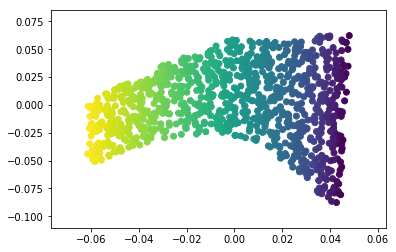

In [19]:
#Question 2.1.2
# LLE and Isomap

lle= manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=12).fit_transform(data).T
plt.scatter(lle[0],lle[1],c=label)
plt.show()

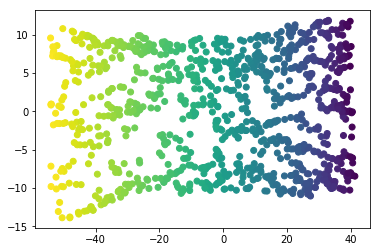

In [20]:
iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data).T
plt.scatter(iso[0],iso[1],c=label)
plt.show()

### Question 2.1.3 - 1
- We will write a funtion that choose to randon points  

In [21]:
# section 1 - choose two nearest neighbors- 
def find_distances(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 2).fit(data_reduce)
    distances, labels = nbrs.kneighbors(data_reduce)
    index = pd.DataFrame(labels).sample(n=1)
    two_points_original = data.iloc[index.values[0],:]
    two_points_PR = data_reduce.iloc[index.values[0],:]
    
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')


find_distances(data, pr_dict['pca'])   
find_distances(data,pr_dict['kpca'])
find_distances(data,pd.DataFrame(iso))
find_distances(data,pd.DataFrame(lle))


The original distance is 25.1607389635052, the distance in the paramer reduction is 15.039706911999241
The original distance is 21.01332151835737, the distance in the paramer reduction is 0.3386523027634453
The original distance is 15.459269288560925, the distance in the paramer reduction is 909.130097767752
The original distance is 15.459269288560925, the distance in the paramer reduction is 1.4142135623730954


In [22]:
# section 2 - choose two points that are not in each other's 40'th nearest neighbors-
def find_distance_40(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
    distances, labels = nbrs.kneighbors(data)
    pd.DataFrame(labels).head()
    tmp=pd.DataFrame(labels)
    while(True):
        pair = np.reshape(tmp.sample(n=1).values,-1)
        pair = [pair[0],pair[-1]]
        if pair[0] not in tmp.loc[pair[1],:]:
            break 
    two_points_original = data.iloc[pair,:]
    two_points_PR = data_reduce.iloc[pair,:]
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')
    

In [23]:
find_distance_40(data, pr_dict['pca'])   
find_distance_40(data,pr_dict['kpca'])
find_distance_40(data,pd.DataFrame(iso).T)
find_distance_40(data,pd.DataFrame(lle).T)

The original distance is 20.01585992274702, the distance in the paramer reduction is 13.695828548768786
The original distance is 24.39983779509082, the distance in the paramer reduction is 0.32191275246063106
The original distance is 30.154850521554, the distance in the paramer reduction is 28.255474843843032
The original distance is 31.440024272753277, the distance in the paramer reduction is 0.06017530861125809


# section 3 - choose two points that are not in each other's 40'th nearest neighbors-


In [24]:
def find_12(data, data_reduce):
    nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]
    for dataIdx in data.index:
        high=labels_high[dataIdx,:]
        low=labels_low[dataIdx,:]
        k_nn_not_12=np.intersect1d(high,low)
        # assumed that the meaning was to exclude from the 12NN in low-dimension, those who was also included in high-dimension-
        low=np.delete(low,k_nn_not_12)
        c.append(data_reduce.loc[low,:])
        # assuming that the meaning of |c(i)| == number of data points in the group c(i)
    print(f' mean of all c = {np.mean(([len(x) for x in c]))}')
    return c
#displaying mean value of c-
c=dict()
c['pca']=find_12(data, pr_dict['pca']) 
c['kpca']=find_12(data,pr_dict['kpca'])
c['iso']=find_12(data,pd.DataFrame(iso).T)
c['lle']=find_12(data,pd.DataFrame(lle).T)

c:\users\alejandro\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.932
 mean of all c = 11.912
 mean of all c = 11.876
 mean of all c = 11.905


In [25]:
c['pca'][1]

,0,1
1,-11.879998,-3.647147
641,-11.884939,-3.457346
528,-11.641057,-3.690987
868,-11.593468,-3.444609
340,-11.894751,-3.120831
782,-11.509813,-3.187137
154,-11.846162,-3.027256
477,-11.289728,-4.051647
480,-11.151430,-3.615355
596,-11.140034,-3.652878


In [26]:
# section 3 - calculate the mean MDS measure of distances -
def mean_MDS(data,data_reduce):
    """nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]"""
    c=find_12(data, data_reduce) 
    mds=[] 
    for num, c_i in enumerate(c):
        x_i=data.loc[num,:]
        y_i=data_reduce.loc[num,:]
        sum_i=0
        for dataIdx in c_i.index:
            x=data.loc[dataIdx,:]
            y=data_reduce.loc[dataIdx,:]
            high_dist = np.linalg.norm([x,x_i])
            low_dist = np.linalg.norm([y,y_i])
            inner_argument=np.square(high_dist-low_dist)
            sum_i=sum_i+inner_argument
        mds.append(sum_i/len(c_i))
    print(f' mean of all mds = {np.mean(mds)}')
    return mds

#displaying mean value of mds-
mds=dict()
mds['pca']= mean_MDS(data, pr_dict['pca']) 
mds['kpca']=mean_MDS(data,pr_dict['kpca'])
mds['iso']= mean_MDS(data,pd.DataFrame(iso).T)
mds['lle']= mean_MDS(data,pd.DataFrame(lle).T)

#for point=3 for example-


c:\users\alejandro\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.932
 mean of all mds = 104.67096587406802
 mean of all c = 11.912
 mean of all mds = 483.6927944873472
 mean of all c = 11.876
 mean of all mds = 598.0961717369184
 mean of all c = 11.905
 mean of all mds = 495.43379590749424


In [27]:

nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
distances, labels = nbrs.kneighbors(data)
pd.DataFrame(labels).head()
tmp=pd.DataFrame(labels)
while(True):
    pair = np.reshape(tmp.sample(n=1).values,-1)
    pair = [pair[0],pair[-1]]
    if pair[0] not in tmp.loc[pair[1],:]:
        break 


# 2.2 Face Dataset
### 2.2.1 PCA Based Methods + 2.2.2 Manifold Based Methods + 
###    2.2.3 Euclidean distances in the low-dimensional representation

In [28]:

def Repeat_sections(data,d,color_label):    
    pr_dict ={}
    data=data#NO NEED IN TRANSPOSE
    pr_dict['extension']= data
    
    # 2.2.1 PCA Based Methods
    pr_dict['pca'] = (decomposition.PCA(n_components=d ,whiten=True).fit_transform(data))
    pr_dict['kpca'] = decomposition.KernelPCA(n_components=d ,kernel='rbf',gamma=0.03).fit_transform(data)
    print('original')
    print(f' shape of faces = {data.shape}')
    plot3images(data,int(math.sqrt(data.shape[1])))
#     print(int(math.sqrt(d)))
    print(f' USing PCA, n_components= {d}')
    projectedFaces=pd.DataFrame(pr_dict['pca'])
#     print(f' shape of projected faces = {projectedFaces.shape}')
#     plot3images(projectedFaces,int(math.sqrt(d)))
    plt.scatter(projectedFaces[0],projectedFaces[1],c=color_label)
    plt.show()
    print(f' USing KPCA, n_components= {d}')
    k_projectedFaces=pd.DataFrame(pr_dict['kpca'])
    print(f' shape of projected faces = {k_projectedFaces.shape}')
#     plot3images(k_projectedFaces,int(math.sqrt(d)))
    plt.scatter(k_projectedFaces[0],k_projectedFaces[1],c=color_label)
    plt.show()
    
    # 2.2.2 Manifold Based Methods
    pr_dict['lle']= manifold.LocallyLinearEmbedding(n_components=d,n_neighbors=12).fit_transform(data)
    print(f' USing LLE, n_components= {d}')
    LLE_projectedFaces=pd.DataFrame(pr_dict['lle'])
    print(f' shape of faces = {data.shape}')
    print(f' shape of projected faces = {LLE_projectedFaces.shape}')
#     plot3images(LLE_projectedFaces,int(math.sqrt(d)))
    plt.scatter(LLE_projectedFaces[0],LLE_projectedFaces[1],c=color_label)
    plt.show()
    
    pr_dict['iso'] = manifold.Isomap(n_components=d,n_neighbors=7).fit_transform(data)
    print(f' USing ISO, n_components= {d}')
    ISO_projectedFaces=pd.DataFrame(pr_dict['iso'])
    print(f' shape of faces = {data.shape}')
    print(f' shape of projected faces = {ISO_projectedFaces.shape}')
#     plot3images(ISO_projectedFaces,int(math.sqrt(d)))
    plt.scatter(ISO_projectedFaces[0],ISO_projectedFaces[1],c=color_label)
    plt.show()
    
    # 2.2.3 Euclidean distances in the low-dimensional representation
    print(f' Euclidean distances Using PCA, n_components= {d}')
    find_distances(data, projectedFaces)
    find_distance_40(data, projectedFaces)
    find_12(data, projectedFaces)
    mean_MDS(data,projectedFaces)
    print(f' Euclidean distances Using KPCA, n_components= {d}')
    find_distances(data, k_projectedFaces)
    find_distance_40(data, k_projectedFaces)
    find_12(data, k_projectedFaces)
    mean_MDS(data,k_projectedFaces)

    print(f' Euclidean distances Using LLE, n_components= {d}')
    find_distances(data, LLE_projectedFaces)
    find_distance_40(data, LLE_projectedFaces)
    find_12(data, LLE_projectedFaces)
    mean_MDS(data,LLE_projectedFaces)
    
    print(f' Euclidean distances Using ISO, n_components= {d}')
    find_distances(data, ISO_projectedFaces)
    find_distance_40(data, ISO_projectedFaces)
    find_12(data, ISO_projectedFaces)
    mean_MDS(data,ISO_projectedFaces)

original
 shape of faces = (698, 4096)


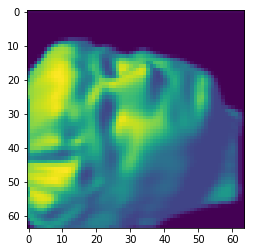

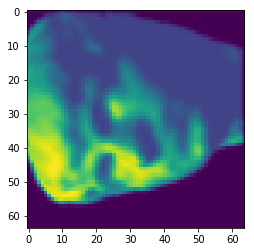

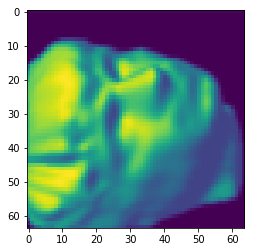

 USing PCA, n_components= 2


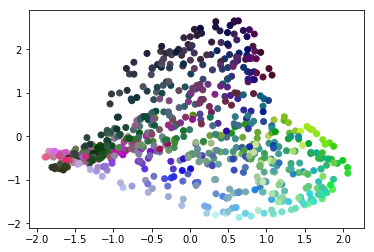

 USing KPCA, n_components= 2
 shape of projected faces = (698, 2)


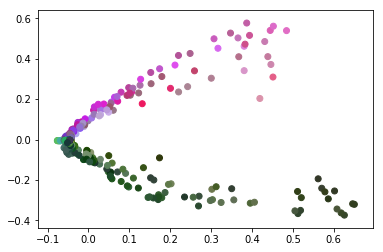

 USing LLE, n_components= 2
 shape of faces = (698, 4096)
 shape of projected faces = (698, 2)


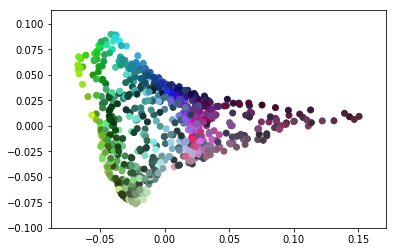

 USing ISO, n_components= 2
 shape of faces = (698, 4096)
 shape of projected faces = (698, 2)


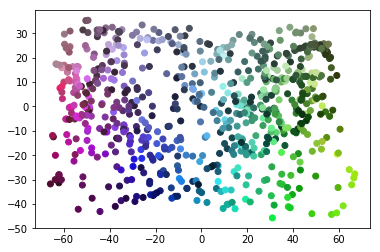

 Euclidean distances Using PCA, n_components= 2
The original distance is 45.76616387646668, the distance in the paramer reduction is 2.7686985355682343
The original distance is 48.52470067862617, the distance in the paramer reduction is 2.708963668852271


c:\users\alejandro\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.932664756446991
 mean of all c = 11.932664756446991
 mean of all mds = 1563.3009209513195
 Euclidean distances Using KPCA, n_components= 2
The original distance is 34.95410236295684, the distance in the paramer reduction is 0.07955800696194482
The original distance is 19.13542064865582, the distance in the paramer reduction is 0.689835176628135
 mean of all c = 11.954154727793696
 mean of all c = 11.954154727793696
 mean of all mds = 1735.5370596014877
 Euclidean distances Using LLE, n_components= 2
The original distance is 44.222512713298435, the distance in the paramer reduction is 0.0500087104854115
The original distance is 47.575207752724324, the distance in the paramer reduction is 0.0696938886127752
 mean of all c = 11.925501432664756
 mean of all c = 11.925501432664756
 mean of all mds = 1692.1081387533018
 Euclidean distances Using ISO, n_components= 2
The original distance is 49.74111480816631, the distance in the paramer reduction is 43.49072256282063
The 

In [29]:
#now trying the function on Face Dataset
import math

#print(partialfacesData)
Repeat_sections(facesData,2,faces_rgb_color)

original
 shape of faces = (1000, 784)


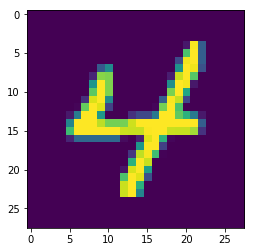

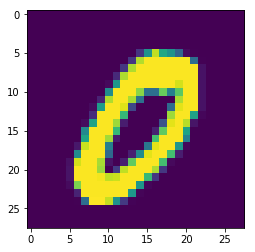

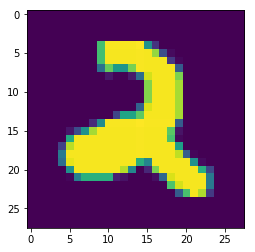

 USing PCA, n_components= 2


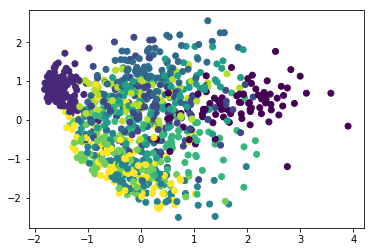

 USing KPCA, n_components= 2
 shape of projected faces = (1000, 2)


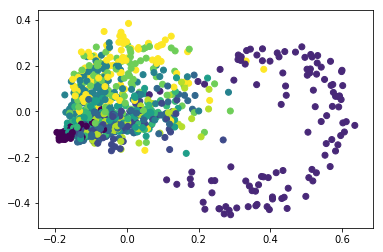

 USing LLE, n_components= 2
 shape of faces = (1000, 784)
 shape of projected faces = (1000, 2)


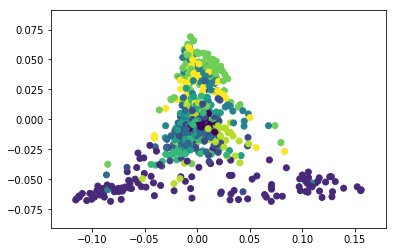

 USing ISO, n_components= 2
 shape of faces = (1000, 784)
 shape of projected faces = (1000, 2)


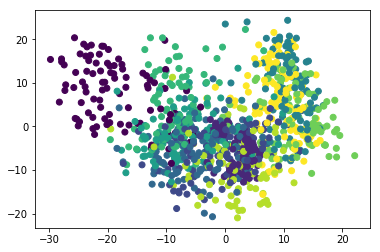

 Euclidean distances Using PCA, n_components= 2
The original distance is 14.650184631347656, the distance in the paramer reduction is 1.4372675043300973
The original distance is 13.762117385864258, the distance in the paramer reduction is 2.1760567644255864


c:\users\alejandro\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.976
 mean of all c = 11.976
 mean of all mds = 127.83548467013718
 Euclidean distances Using KPCA, n_components= 2
The original distance is 13.797401428222656, the distance in the paramer reduction is 0.11740557104349136
The original distance is 12.165452003479004, the distance in the paramer reduction is 0.30975064635276794
 mean of all c = 11.972
 mean of all c = 11.972
 mean of all mds = 166.0572343100201
 Euclidean distances Using LLE, n_components= 2
The original distance is 13.649258613586426, the distance in the paramer reduction is 0.015681132988631694
The original distance is 14.150813102722168, the distance in the paramer reduction is 0.01729018524005353
 mean of all c = 11.956
 mean of all c = 11.956
 mean of all mds = 171.6900540777376
 Euclidean distances Using ISO, n_components= 2
The original distance is 10.520987510681152, the distance in the paramer reduction is 7.288737878114314
The original distance is 10.690140724182129, the distance in the param

In [30]:
mist_data = pd.DataFrame(train_set[0])
mist_data = mist_data.sample(1000)
mist_label = pd.DataFrame(train_set[1]).loc[mist_data.index,:]/10
mist_data = pd.DataFrame(mist_data.values)

Repeat_sections(mist_data,2,np.reshape(mist_label.values,-1))

### 2.4 Questions
Answer in the following questions for all datasets (except when asked otherwise).
1. For the Swiss Role dataset, does the PCA with the manually added features perform better than KPCA? Why?
    - In theory it should not, all the point of the KPCA is not using the function $\sigma(x)$ , instead use only the kernel trick. But we found a $\sigma(x)$ that give good results 
2. Explain the results. Which algorithm(s) performs the best on the tasks?
    - The best algorithms are LLE and Isomap:
    
        - Lle: is much faster Than Isomap and gives a good result
        - Isomap: is the winner is a great algorithm to unfold multidimensional data
            - For the MMist data we set a color for each number give on the labels this way we can see that some numbers group together witch is really nice considering the input is pixels 
            - For the faces we use 3 parameter for the colors where the 'poseX', 'poseY'are the hue and the saturation and the light is light on the coloring (HSL color space) we can see on Isomap that there is transition between the poses
            
#Can you explain why (by discussing the properties of the algorithms and
the type of datasets)?
3. What would you expect to be the value of $\frac{1}{n} \sum_{ i=1}^{Pn} |C(x_i)_j| $ when using a ‘good’ DR algorithm?
    - anwser
4. Is the choice of d = 2 justified? i.e, is it justified to perform DR to R2 forthe datasets relying on the estimator ^ m?


In [3]:
# Question 3
data = sklearn.datasets.fetch_lfw_people()

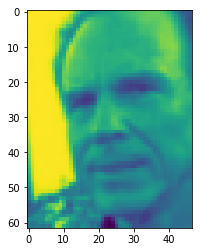

In [38]:

a=data['data'][5554,:]

plt.imshow(np.reshape(a,(62,47)))
plt.show()

In [109]:

def randon_pathc(image):    
    x_ =np.random.randint(0,41)
    y_ =np.random.randint(0,56)
    return image[y_:y_+6,x_:x_+6]

def build_dataset(base_data, n_samples=1000):
    patch=[]
    data = pd.DataFrame(base_data)
    for _ in range(n_samples):
        randon_sample=randon_pathc(np.reshape(data.sample(1).values,(62,47)))
        patch.append(np.reshape(randon_sample,-1))
    return pd.DataFrame(sklearn.preprocessing.MinMaxScaler().fit_transform(np.array(patch)))
new_dataset =build_dataset(data['data'],n_samples=1500)

In [110]:
new_dataset.shape
# pca = sklearn.decomposition.PCA().fit(new_dataset)

(1500, 36)

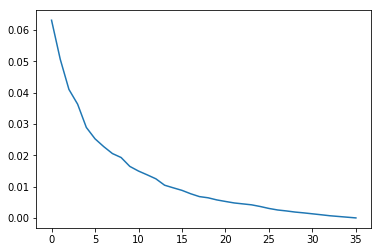

Before and after the recunstruction with 36 Principal components


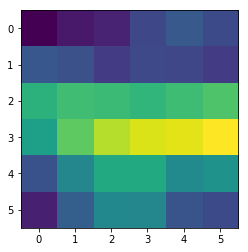

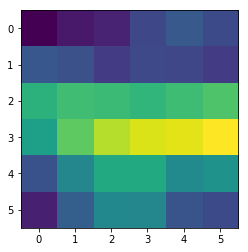

Before and after the recunstruction with 29 Principal components


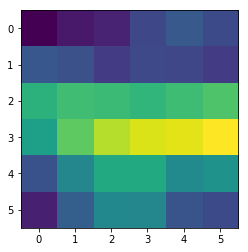

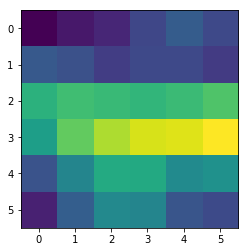

Before and after the recunstruction with 22 Principal components


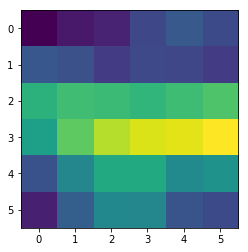

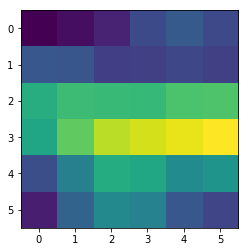

Before and after the recunstruction with 15 Principal components


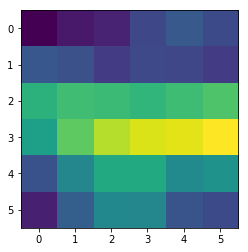

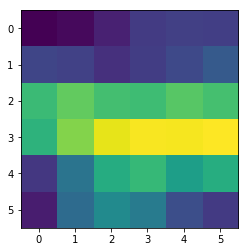

Before and after the recunstruction with 8 Principal components


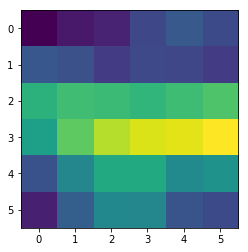

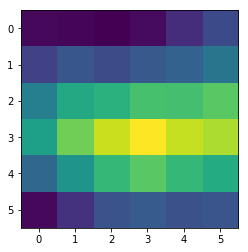

In [155]:
def reduce_and_construct(data_set, dimention):
    pca = decomposition.PCA(n_components=dimention, svd_solver='auto') # creating a PCA object
    pca.fit(data_set)
    data_set_pc = pca.transform(data_set)
    reconstruct = data_set_pc.dot(pca.components_)
    return pd.DataFrame(sklearn.preprocessing.MinMaxScaler().fit_transform(np.array(reconstruct)))

# Easy error analiziz 
plt.plot([np.mean(np.mean(np.abs(new_dataset-reduce_and_construct(new_dataset,x)))) for x in range(1,37)])
plt.show()


for i in range(5):
    b = reduce_and_construct (new_dataset,36- i*7)
#     ax = plt.subplots(1,2)
#     ax = np.reshape(ax,-1)
    print(f'Before and after the recunstruction with {36- i*7} Principal components')
    plt.imshow(np.reshape(new_dataset.iloc[4,:].values,(6,6)))
    plt.show()
    plt.imshow(np.reshape(b.iloc[4,:].values,(6,6)))
    plt.show()


No handles with labels found to put in legend.


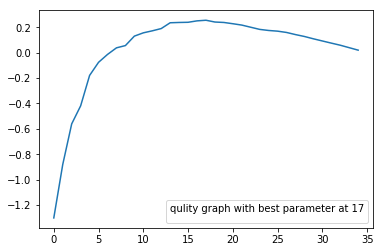

In [168]:
def reconstruction_error(original, reconstruc):
    normals_vec = [np.sum(np.abs(original.iloc[ind,:].values-reconstruc.iloc[ind,:].values)) for ind in range(original.shape[0])]
    return np.mean(normals_vec)

def quality(original,dimention): 
    E_r =reconstruction_error(original,reduce_and_construct(original,dimention))
    CR = dimention/float(original.shape[1])
    return 1 -(E_r+CR)
qua = [quality(new_dataset,dim) for dim in range(1,36)]
best_dim_number = np.argmax(qua)

plt.plot(qua)
plt.legend(title=f'qulity graph with best parameter at {best_dim_number}')
plt.show()

Before and after the recunstruction with 3 Principal components


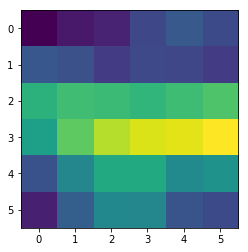

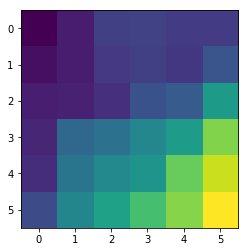

Before and after the recunstruction with 17 Principal components


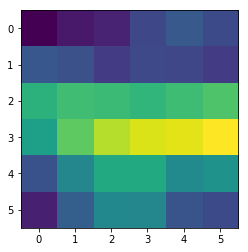

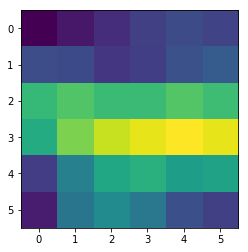

Before and after the recunstruction with 36 Principal components


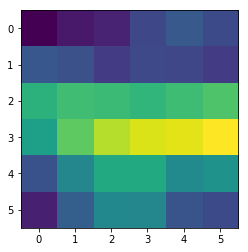

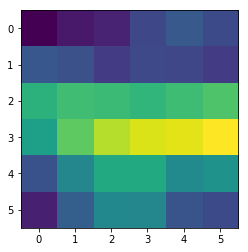

In [170]:
for i in [3,17,36]:
    b = reduce_and_construct (new_dataset,i)
#     ax = plt.subplots(1,2)
#     ax = np.reshape(ax,-1)
    print(f'Before and after the recunstruction with {i} Principal components')
    plt.imshow(np.reshape(new_dataset.iloc[4,:].values,(6,6)))
    plt.show()
    plt.imshow(np.reshape(b.iloc[4,:].values,(6,6)))
    plt.show()